In [255]:
#Importing Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [256]:
con_pd=pd.read_csv('concrete (1).csv')
con_pd.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [257]:
con_pd.shape

(1030, 9)

In [258]:
con_pd.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [259]:
con_pd.isnull().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

Univariate and Multivariate analysis

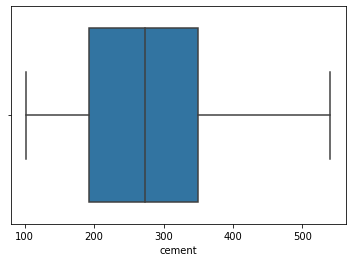

In [260]:
sns.boxplot(con_pd['cement'])

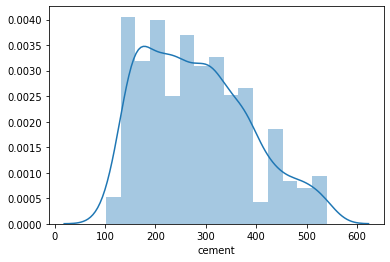

In [261]:
sns.distplot(con_pd['cement'])

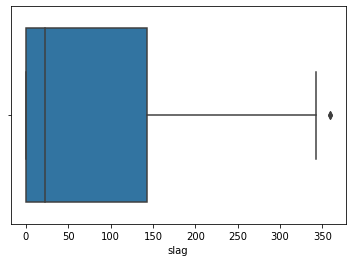

In [262]:
sns.boxplot(con_pd['slag'])

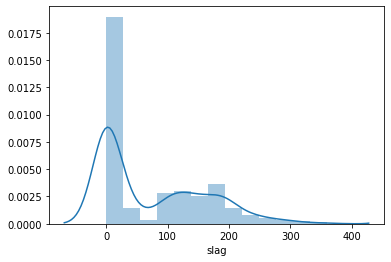

In [263]:
sns.distplot(con_pd['slag'])

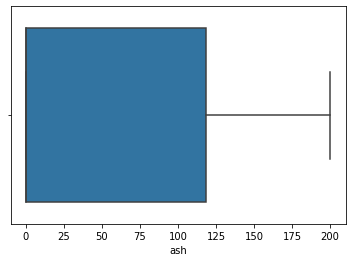

In [264]:
sns.boxplot(con_pd['ash'])

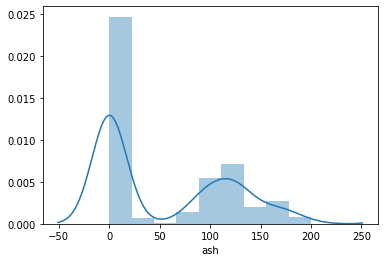

In [265]:
sns.distplot(con_pd['ash'])

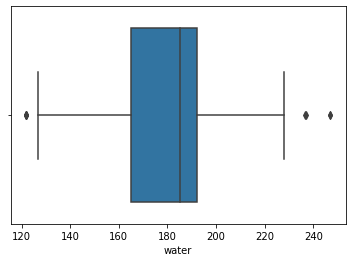

In [266]:
sns.boxplot(con_pd['water'])

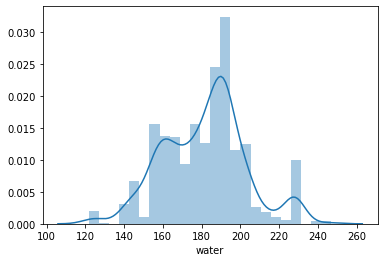

In [267]:
sns.distplot(con_pd['water'])

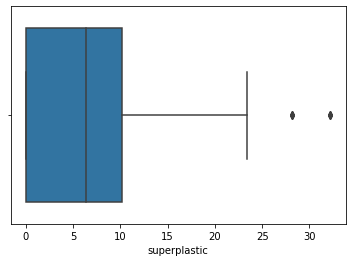

In [268]:
sns.boxplot(con_pd['superplastic'])

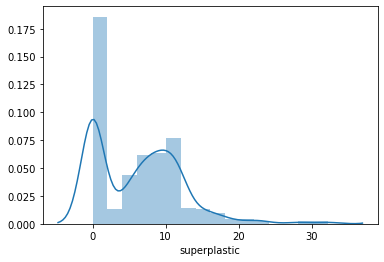

In [269]:
sns.distplot(con_pd['superplastic'])

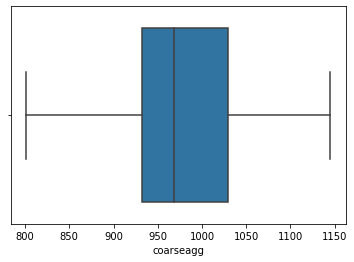

In [270]:
sns.boxplot(con_pd['coarseagg'])

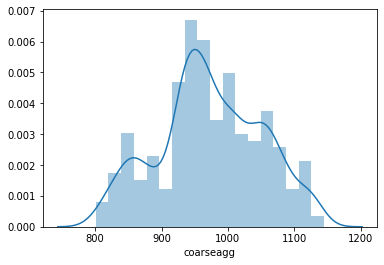

In [271]:
sns.distplot(con_pd['coarseagg'])

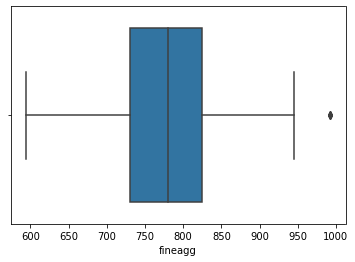

In [272]:
sns.boxplot(con_pd['fineagg'])

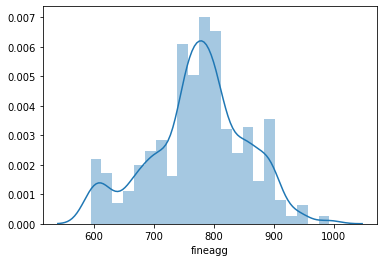

In [273]:
sns.distplot(con_pd['fineagg'])

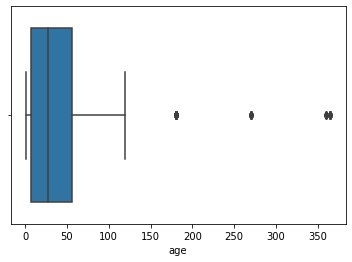

In [274]:
sns.boxplot(con_pd['age'])

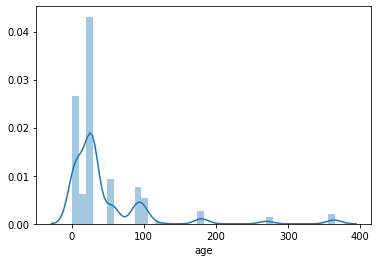

In [275]:
sns.distplot(con_pd['age'])

Removal of outliers

In [276]:
con_pd=con_pd.drop(con_pd[con_pd['age']>150].index)

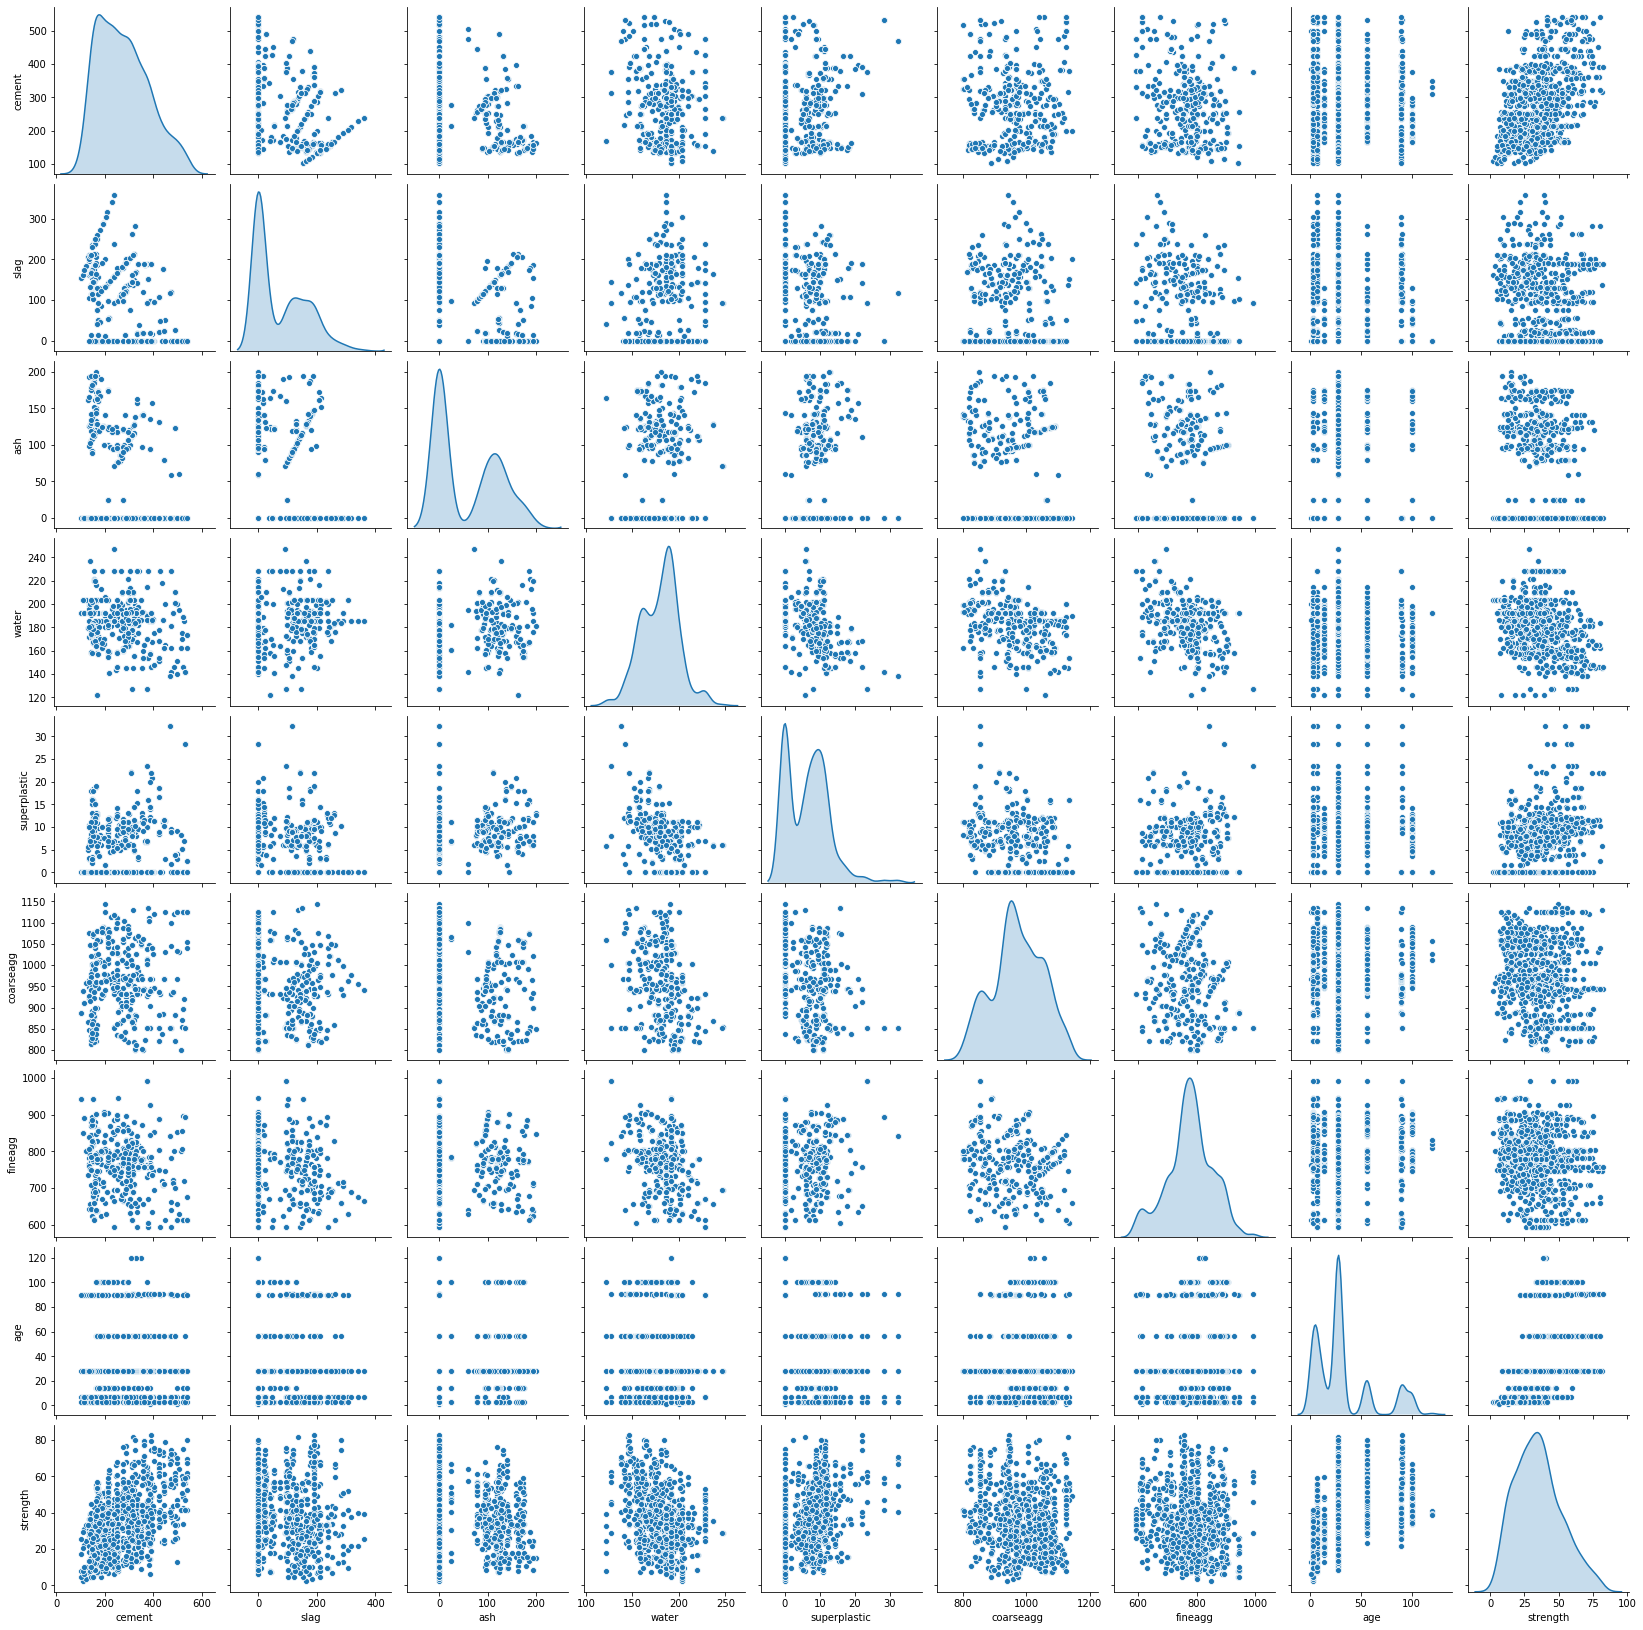

In [277]:
sns.pairplot(con_pd,diag_kind='kde')

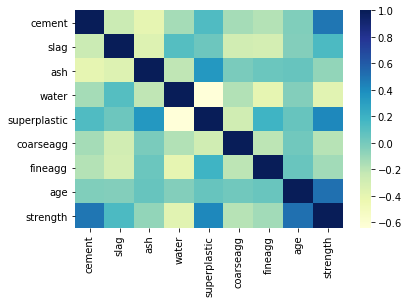

In [278]:
sns.heatmap(con_pd.corr(),cmap='YlGnBu')

In [279]:
#con_pd=con_pd.drop(['cement'],axis=1)

Model training and Tuning

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
score=[]
r2score=[]
mse_error=[]
X=con_pd.drop(['strength'],axis=1)
Y=con_pd['strength']
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [281]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [282]:
print(lr.score(x_train,y_train))

0.7675614579584734


In [283]:
print(lr.score(x_test,y_test))
score.append(lr.score(x_test,y_test))

0.727697855543366


In [284]:
cross_val_score(lr,x_train,y_train,cv=10)

array([0.7205412 , 0.81425563, 0.74993285, 0.78428539, 0.79124861,
       0.74204498, 0.62019247, 0.76995827, 0.74621969, 0.81126192])

In [285]:
y_pred=lr.predict(x_test)

In [286]:
print(r2_score(y_pred,y_test))
r2score.append(r2_score(y_pred,y_test))
mse_error.append(mean_squared_error(y_pred,y_test))

0.6176299649291683


In [287]:
print(lr.coef_)

[ 0.11650026  0.09246082  0.0758203  -0.19357364  0.06027396 -0.00386203
  0.00635547  0.29758757]


In [288]:
for i,v in enumerate(lr.coef_):
    print('feature ',i+1,' importance ',v)

feature  1  importance  0.11650026387656771
feature  2  importance  0.09246082248152812
feature  3  importance  0.07582029759777775
feature  4  importance  -0.1935736426928149
feature  5  importance  0.06027396473938535
feature  6  importance  -0.0038620338045496244
feature  7  importance  0.006355471889374672
feature  8  importance  0.29758757363365695


Linear Regression feature importance

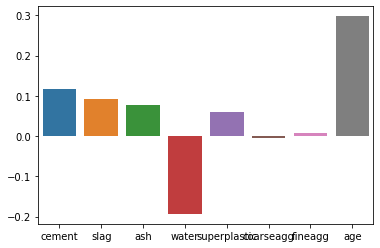

In [289]:
sns.barplot(x=con_pd.columns[:-1],y=lr.coef_)

In [290]:
from sklearn.ensemble import RandomForestRegressor
ran_reg=RandomForestRegressor(n_estimators=100,max_features='auto',criterion='mse')
ran_reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [291]:
print(ran_reg.score(x_train,y_train))

0.9865676598415736


In [292]:
print(ran_reg.score(x_test,y_test))
score.append(ran_reg.score(x_test,y_test))

0.892853319178114


In [293]:
cross_val_score(ran_reg,x_train,y_train)

array([0.90168189, 0.89199315, 0.90436056, 0.86878763, 0.8958962 ])

In [294]:
y_pred=ran_reg.predict(x_test)
print(r2_score(y_pred,y_test))
r2score.append(r2_score(y_pred,y_test))
mse_error.append(mean_squared_error(y_pred,y_test))

0.8685206534041463


In [295]:
for i,v in enumerate(ran_reg.feature_importances_):
    print('feature ',i+1,' importance ',v)

feature  1  importance  0.3331696898136214
feature  2  importance  0.07918904145975031
feature  3  importance  0.018397221942269833
feature  4  importance  0.11233380887191965
feature  5  importance  0.07198697054392512
feature  6  importance  0.03010766293033092
feature  7  importance  0.0327838376350977
feature  8  importance  0.3220317668030851


Random Forest Regressor feature importance

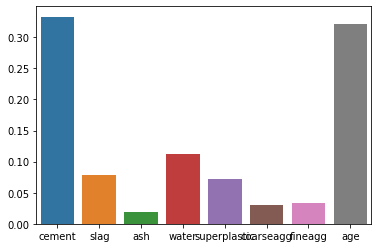

In [296]:
sns.barplot(x=con_pd.columns[:-1],y=ran_reg.feature_importances_)

In [297]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [298]:
print(ada.score(x_train,y_train))

0.8284147182827597


In [299]:
print(ada.score(x_test,y_test))
score.append(ada.score(x_test,y_test))

0.7994310112690567


In [300]:
cross_val_score(ada,x_train,y_train,cv=10)

array([0.78816543, 0.82091166, 0.79044298, 0.75191725, 0.81283426,
       0.76386908, 0.73403074, 0.76451036, 0.80443692, 0.78423652])

In [301]:
y_pred=ada.predict(x_test)
print(r2_score(y_pred,y_test))
r2score.append(r2_score(y_pred,y_test))
mse_error.append(mean_squared_error(y_pred,y_test))

0.6260734732894723


In [302]:
from sklearn.ensemble import GradientBoostingRegressor
gradient=GradientBoostingRegressor()
gradient.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [303]:
print(gradient.score(x_train,y_train))

0.955216989961751


In [304]:
print(gradient.score(x_test,y_test))
score.append(gradient.score(x_test,y_test))

0.9025094917531342


In [305]:
cross_val_score(gradient,x_train,y_train,cv=10)

array([0.90661495, 0.92578641, 0.92218175, 0.83010348, 0.90085058,
       0.87912435, 0.84759344, 0.89506871, 0.89179052, 0.9079354 ])

In [306]:
y_pred=gradient.predict(x_test)
print(r2_score(y_pred,y_test))
r2score.append(r2_score(y_pred,y_test))
mse_error.append(mean_squared_error(y_pred,y_test))

0.8815405487411414


In [307]:
print(gradient.feature_importances_)

[0.33718522 0.07832082 0.02132371 0.11994046 0.07771363 0.01501556
 0.0171938  0.33330679]


In [308]:
for i,v in enumerate(gradient.feature_importances_):
    print('feature ',i+1,' importance ',v)

feature  1  importance  0.3371852244020794
feature  2  importance  0.07832082339819448
feature  3  importance  0.02132370643606249
feature  4  importance  0.11994046309348254
feature  5  importance  0.07771363043648359
feature  6  importance  0.015015562596982683
feature  7  importance  0.017193796035287395
feature  8  importance  0.33330679360142745


Gradient Boosting Regression feature importance

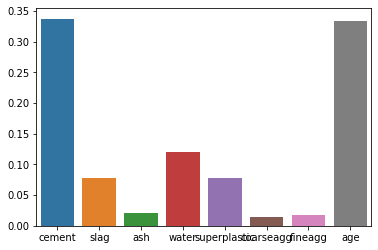

In [309]:
sns.barplot(x=con_pd.columns[:-1],y=gradient.feature_importances_)

In [310]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgbr=xg.XGBRegressor(objective='reg:linear',n_estimators=10)

In [311]:
xgbr.fit(x_train,y_train)

[23:36:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [312]:
y_pred=xgbr.predict(x_test)

In [313]:
cross_val_score(xgbr,x_train,y_train,cv=10)

[23:36:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

array([-0.13934352,  0.2173736 ,  0.20413978,  0.12986897,  0.11140711,
       -0.23708259,  0.04659846,  0.15278321, -0.06692732,  0.10361126])

In [314]:
print(r2_score(y_pred,y_test))

-3.413736180241971


In [315]:
print(np.sqrt(MSE(y_pred,y_test)))

16.851520303990416


In [316]:
result_df=pd.DataFrame({'name':['Linear Regression','Random Forest Regression','Ada boosting regression','Gradient boosting regression'],
                     'score':score,
                       'r2_score':r2score,
                       'mean squared error':mse_error})

In [317]:
result_df

,name,score,r2_score,mean squared error
0,Linear Regression,0.727698,0.617630,80.615198
1,Random Forest Regression,0.892853,0.868521,31.720833
2,Ada boosting regression,0.799431,0.626073,59.378558
3,Gradient boosting regression,0.902509,0.881541,28.862118


By this we come to know that Gradient boosting regression performes better out of all the models